# Data Exploration & Analysis of the Lehman Baseball Database
## http://seanlahman.com/baseball-archive/statistics

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from copy import copy
from collections import namedtuple

### The data consists of over a dozen CSV files.  They offer a MySQL version but let's see if we can get away without that.

In [3]:
from os import listdir
from os.path import isfile, join
path = 'baseballdatabank-master/core/'
files = [f for f in listdir(path) if isfile(join(path, f)) and f[len(f) - 3:] == 'csv']
print(files)

dfs = {}
for f in files:
    dfs[f] = pd.read_csv(path + f)
    print(f)
    print(dfs[f].columns)

['AllstarFull.csv', 'Appearances.csv', 'AwardsManagers.csv', 'AwardsPlayers.csv', 'AwardsShareManagers.csv', 'AwardsSharePlayers.csv', 'Batting.csv', 'BattingPost.csv', 'CollegePlaying.csv', 'Fielding.csv', 'FieldingOF.csv', 'FieldingPost.csv', 'HallOfFame.csv', 'HomeGames.csv', 'Managers.csv', 'ManagersHalf.csv', 'Master.csv', 'Parks.csv', 'Pitching.csv', 'PitchingPost.csv', 'Salaries.csv', 'Schools.csv', 'SeriesPost.csv', 'Teams.csv', 'TeamsFranchises.csv', 'TeamsHalf.csv']
AllstarFull.csv
Index(['playerID', 'yearID', 'gameNum', 'gameID', 'teamID', 'lgID', 'GP',
       'startingPos'],
      dtype='object')
Appearances.csv
Index(['yearID', 'teamID', 'lgID', 'playerID', 'G_all', 'GS', 'G_batting',
       'G_defense', 'G_p', 'G_c', 'G_1b', 'G_2b', 'G_3b', 'G_ss', 'G_lf',
       'G_cf', 'G_rf', 'G_of', 'G_dh', 'G_ph', 'G_pr'],
      dtype='object')
AwardsManagers.csv
Index(['playerID', 'awardID', 'yearID', 'lgID', 'tie', 'notes'], dtype='object')
AwardsPlayers.csv
Index(['playerID', 'awa

# Desired Attributes
* height
* age at debut
* debut year
* birth location
* bats (r or l)
* throws (r or l)
* years of school
* position played most
* number of positions played
* school location
* career year
* OBS
* label

## Master.csv

In [38]:
dfs['Master.csv'].head()

,playerID,birthYear,birthMonth,birthDay,birthCountry,birthState,birthCity,deathYear,deathMonth,deathDay,...,nameLast,nameGiven,weight,height,bats,throws,debut,finalGame,retroID,bbrefID
0,aardsda01,1981.0,12.0,27.0,USA,CO,Denver,NaN,NaN,NaN,...,Aardsma,David Allan,220.0,75.0,R,R,2004-04-06,2015-08-23,aardd001,aardsda01
1,aaronha01,1934.0,2.0,5.0,USA,AL,Mobile,NaN,NaN,NaN,...,Aaron,Henry Louis,180.0,72.0,R,R,1954-04-13,1976-10-03,aaroh101,aaronha01
2,aaronto01,1939.0,8.0,5.0,USA,AL,Mobile,1984.0,8.0,16.0,...,Aaron,Tommie Lee,190.0,75.0,R,R,1962-04-10,1971-09-26,aarot101,aaronto01
3,aasedo01,1954.0,9.0,8.0,USA,CA,Orange,NaN,NaN,NaN,...,Aase,Donald William,190.0,75.0,R,R,1977-07-26,1990-10-03,aased001,aasedo01
4,abadan01,1972.0,8.0,25.0,USA,FL,Palm Beach,NaN,NaN,NaN,...,Abad,Fausto Andres,184.0,73.0,L,L,2001-09-10,2006-04-13,abada001,abadan01


## Height

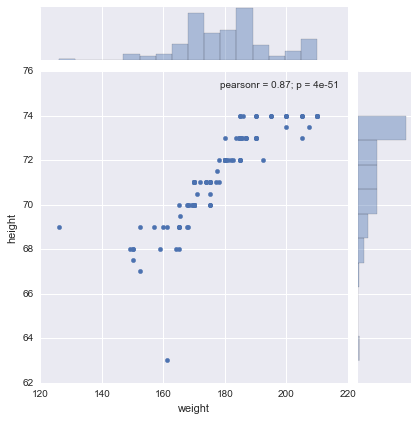

In [4]:
h_grp = dfs['Master.csv'].groupby(by='birthYear').median()
h = h_grp[['deathYear', 'weight', 'height']].reset_index()

sns.jointplot(h['weight'], h['height'])

### It looks like height is limited to 74 inches.  Humans don't work that way.

//anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


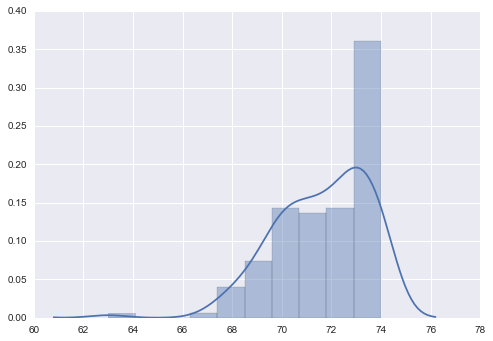

In [5]:
ht = [x for x in h['height'] if not np.isnan(x)]
sns.distplot(ht)

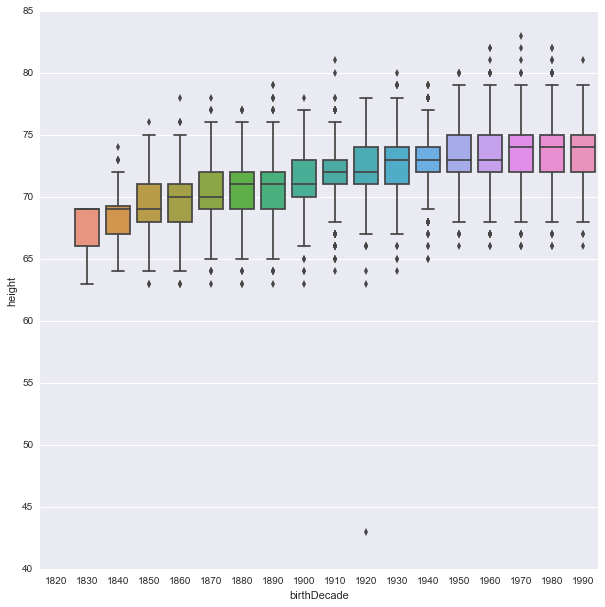

In [19]:
# sns.barplot(h['birthYear'], h['height'])
h = copy(dfs['Master.csv'][['birthYear', 'height']])
d = [str(x)[0:3] + '0' for x in h['birthYear']]
h['birthDecade'] = d
h = h.sort_values(by='birthDecade')
h = h[h['birthDecade'] != 'nan0']
plt.figure(figsize=(10,10))
sns.boxplot(x="birthDecade", y="height", data=h)